In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(16,8)})

In [16]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [17]:
df_comp = df
df_comp.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,204977,Efile Acceptance,2017-01-02 05:39:00,2017-01-03 09:03:00,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have no...,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02 09:03:00,2017-01-04 16:56:00,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN
2,204980,Data map incorrectly pulling in values,2017-01-02 11:25:00,2017-01-03 15:48:00,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports...,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula i...
3,204981,The New Corptax Connect Website is not properl...,2017-01-02 12:06:00,2017-01-03 09:26:00,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system....,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03 07:17:00,2017-01-05 08:21:00,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and...


In [25]:
dfc = df[df.Product == "Compliance"]
dfc = df
# df_comp['Date Created'] = df_comp['Date Created'].dt.date
# df_comp['Date Closed'] = df_comp['Date Closed'].dt.date
df_comp['Date'] = pd.to_datetime(df_comp['Date Created'], errors='coerce')
dfc = df_comp

In [26]:
# Adding a new column which will have the number of tickets per day
newdf = dfc[["Date","Case Number"]]
newdf.drop_duplicates(inplace=True)
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = pd.DataFrame(newdf.groupby([newdf["Date"].dt.date]).count()["Case Number"])
newdf = newdf.reset_index()
newdf.index = newdf.Date
newdf['Date'] = pd.to_datetime(newdf['Date'], errors='coerce')
newdf = newdf.asfreq('D')
newdf = newdf.groupby(pd.Grouper(freq="M")).sum()
newdf

,Case Number
Date,
2017-01-31,2206.0
2017-02-28,2377.0
2017-03-31,3326.0
2017-04-30,2186.0
2017-05-31,2581.0
...,...
2022-04-30,1871.0
2022-05-31,1787.0
2022-06-30,2112.0


In [27]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2017-01-31 to 2022-08-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  68 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [28]:
f = Forecaster(y=newdf['Case Number'],current_dates=newdf.index)
f

Forecaster(
    DateStartActuals=2017-01-31T00:00:00.000000000
    DateEndActuals=2022-08-31T00:00:00.000000000
    Freq=M
    N_actuals=68
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

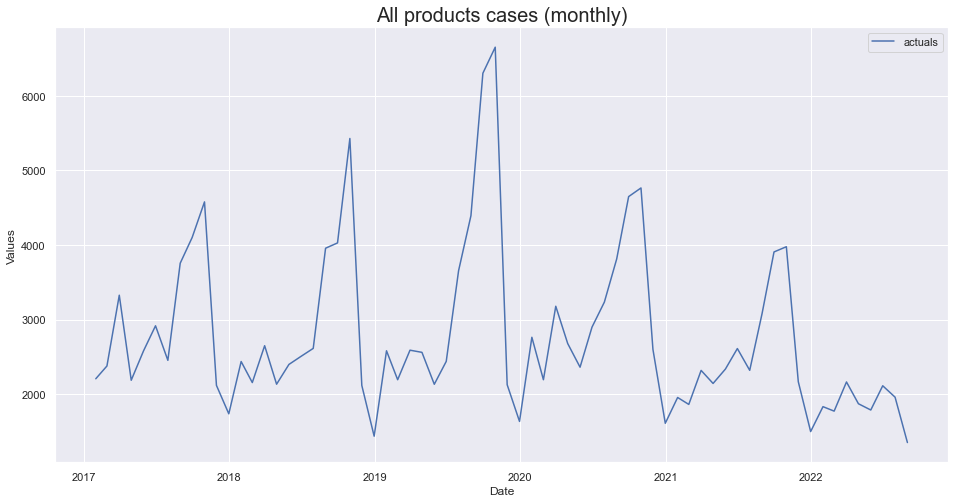

In [29]:
f.plot()
plt.title('All products cases (monthly)',size=20)
plt.show()

In [30]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('prophet')
f

Forecaster(
    DateStartActuals=2017-01-31T00:00:00.000000000
    DateEndActuals=2022-08-31T00:00:00.000000000
    Freq=M
    N_actuals=68
    ForecastLength=12
    Xvars=[]
    Differenced=0
    TestLength=13
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=prophet
    GridsFile=Grids
)

In [31]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.83
the p-value is 0.9922
the series is not stationary
----------------------------------------------------------------------------------------------------


In [34]:
f.manual_forecast(call_me='prophet1')

ModuleNotFoundError: No module named 'fbprophet'